### Least Squares Regression:
- Given data: $(x^{(1)},y^{(1)})$, $(x^{(2)},y^{(2)})$, ... ,$(x^{(n)},y^{(n)})$ $\in$ $R^d\times R$

- Consider y the linear function that fit to data: $\ y = w \cdot x + b \qquad w\in R^d, \ b\in R$

- The objective function to minimize:

$$
L(w,b) = \sum_{i=1}^n (y^{(i)} - (w\cdot x^{(i)} + b))^2 \iff L(w') =  \sum_{i=1}^n (y^{(i)} - w'\cdot x'^{(i)} )^2, \ w'=(
b,w),\ x'^{(i)}=(1,x^{(i)})\in R^{d+1}
$$

- Can be written as matrix vector product:
$$
L(w') =  \|y - X'\cdot w' \|^2, \ X' \in R^{n \times (d+1)}, w' \in R^{(d+1) \times 1}   
$$

- The loss function is minimized at:

$$
w'= (X'^{T}X')^{-1}X'^{T}y
$$

We can achive better estimations using Regression with Regularization effect (Ridge Regression) or Lasso which is also an example of estimators that uses the $l_1$ norm $\|.\|_1$  and gives a sparse w.

$$
L(w,b) = \sum_{i=1}^n (y^{(i)} - (w\cdot x^{(i)} + b))^2 + \lambda \|w\|_2^2 \quad (or \  \lambda \|w\|_1 \  in \  Lasso \ estimator \ case).
$$


### Diabete study with multi-variables linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./diabetes-data.csv')

In [3]:
data.head()

,59,2,32.1,101,157,93.2,38,4,4.8598,87,151
0,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
1,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
2,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
3,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135
4,23,1,22.6,89.0,139,64.8,61.0,2.0,4.1897,68,97


In [4]:
data.shape

(441, 11)

### Data: X, Y

In [5]:
data = np.array(data)

In [6]:
x = data[:,:10]
print(x.shape)

(441, 10)


In [7]:
y = data[:,10]
print(y.shape)

(441,)


In [8]:
def one_feature_regression(x, y, idx):
    X = x[:,[idx]]
    Y = y
    model = linear_model.LinearRegression()
    model.fit(X,Y)
    y_pred = model.predict(X)
    return y_pred 

In [9]:
#Predicton and plots
index = 2
predictions = one_feature_regression(x, y, index)

### Plots

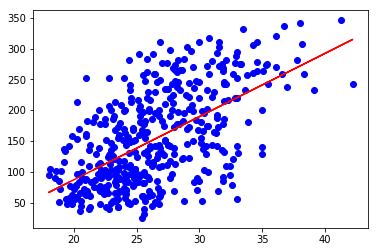

In [10]:
xp = x[:,index]
yp = y

plt.scatter(xp, yp,  c='b')
plt.plot(xp, predictions,  c='r')

In [11]:
print("Mean squared error: ", mean_squared_error(y, predictions))

Mean squared error:  3891.144564073129


### Predict y using more features

In [12]:
#Data Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [13]:
def regression_model(x, y, idx):
    X = x[:,idx]
    model = linear_model.LinearRegression()
    model.fit(X,y)
    return model

In [14]:
#Buil the model
regression_model = regression_model(x_train, y_train, range(0,10))

In [15]:
#Predict on test data
predictions = regression_model.predict(x_test)

In [16]:
#Mean Squared Error
print('Mean Squared Error', mean_squared_error(y_test, predictions))

Mean Squared Error 3213.456971413056
